To explore:
1. top 10 check-in hours
2. least 10 check-in hours
3. proportion of total check in time captured in top 1/10/20/30 check in hours
4. box plot of checkin count by state
5. top 3 business types with the highest checkin counts
6. relation between checkin count and the type of business and the state it is in

## Load Data

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

In [2]:
df_checkin = pd.read_json('dataset/checkin.json', lines=True)
df_biz = pd.read_json('dataset/business.json', lines=True)

contatenate two data frame by business_id

In [3]:
df = df_biz.set_index('business_id').join(df_checkin.set_index('business_id'))

In [4]:
print 'length of checkin data frame '+str(len(df_checkin))
print 'length of business data frame '+str(len(df_biz))
print 'length of contatenated data frame '+ str(len(df))

length of checkin data frame 146350
length of business data frame 174567
length of contatenated data frame 174567


Drop some rows with NaN in checkin time and drop some USELESS columns

In [5]:
df = df.dropna(how='any')  
df.drop(['address','latitude','longitude','neighborhood','is_open','postal_code'],axis = 'columns',inplace = True)

In [6]:
df.sample(10)

,attributes,categories,city,hours,name,review_count,stars,state,time
business_id,,,,,,,,,
HhFsbbmmEg6vgjXnRJ70HQ,"{u'GoodForMeal': {u'dessert': False, u'latenig...","[Restaurants, Burgers, Fast Food]",Phoenix,{},McDonald's,21,2.0,AZ,"{u'Monday': {u'2:00': 1, u'21:00': 1, u'22:00'..."
BPP4_OSqA-KoTDEBWH2ZaA,"{u'BusinessParking': {u'garage': False, u'stre...","[Food, Shopping, Tea Rooms, Coffee & Tea]",Madison,"{u'Tuesday': u'11:00-18:00', u'Friday': u'11:0...",Legacy House Imports - Tea Room,13,5.0,WI,"{u'Tuesday': {u'22:00': 1}, u'Sunday': {u'16:0..."
dCL9Fg3D31UdIAiRk8h8Vg,"{u'GoodForMeal': {u'dessert': False, u'latenig...","[Thai, Restaurants]",Toronto,{},Young Thailand,35,3.5,ON,"{u'Monday': {u'21:00': 2, u'15:00': 1, u'4:00'..."
JGM-SxW_vayu0fBch-U2FQ,"{u'GoodForMeal': {u'dessert': False, u'latenig...","[Food Delivery Services, Italian, Food, Pizza,...",Las Vegas,"{u'Monday': u'16:00-0:00', u'Tuesday': u'16:00...",Pizza Bella,18,1.5,NV,"{u'Sunday': {u'19:00': 1, u'7:00': 1, u'6:00':..."
E759qevG0vnzRCjIHG_G_w,"{u'GoodForKids': True, u'RestaurantsGoodForGro...","[Restaurants, Mexican]",Toronto,{},Juan Gonzalez,8,2.0,ON,"{u'Saturday': {u'20:00': 1}, u'Monday': {u'16:..."
bBF45seuFtERdQIQCzk5yg,"{u'BusinessAcceptsCreditCards': True, u'Busine...","[Session Photography, Event Photography, Boudo...",Las Vegas,"{u'Monday': u'9:00-17:00', u'Tuesday': u'9:00-...",JamieY Photography,14,5.0,NV,"{u'Monday': {u'17:00': 1, u'20:00': 1, u'23:00..."
x0bhlkKwKvVweUvtnq7DMg,{u'BusinessAcceptsCreditCards': True},"[Gas Stations, Automotive]",Tempe,"{u'Tuesday': u'7:00-19:00', u'Friday': u'7:00-...",Progressive Service Center,11,4.0,AZ,"{u'Monday': {u'23:00': 1, u'19:00': 1, u'17:00..."
5oeiMlQFtJFZV6H8qatznw,"{u'GoodForMeal': {u'dessert': False, u'latenig...","[Restaurants, Salvadoran, Latin American]",Phoenix,"{u'Monday': u'11:00-20:00', u'Tuesday': u'11:0...",Salvadoreño Restaurant,98,4.0,AZ,"{u'Monday': {u'19:00': 5, u'21:00': 2, u'17:00..."
04NemZnAY0oyAHCg68x_ww,"{u'GoodForMeal': {u'dessert': False, u'latenig...","[Chicken Wings, Sandwiches, Restaurants, Pizza]",Charlotte,"{u'Monday': u'11:00-2:00', u'Tuesday': u'11:00...",Domino's Pizza,36,2.0,NC,"{u'Monday': {u'23:00': 1}, u'Tuesday': {u'1:00..."


## top & least 10 checkin time 

In [65]:
checkin_time_dict = {}
for i in range(0, len(df)):
    checkin_time_each_biz = df.iloc[i][8]
    for date in checkin_time_each_biz.keys(): #get the date
        time_list = checkin_time_each_biz[date] #get the time of each date
        for time in time_list.keys():
            if (date, time) in checkin_time_dict:
                checkin_time_dict[(date, time)] += time_list[time]
            else:
                checkin_time_dict[(date, time)] = time_list[time] 

Sort the dict

In [72]:
mostPopular_checkin = [(checkin_time_dict[x], x) for x in checkin_time_dict]
mostPopular_checkin.sort()
mostPopular_checkin.reverse()

In [83]:
print "the TOP 10 checkin time is \n" + str(mostPopular_checkin[0:9])
print "the LEAST 10 checkin time is \n"+ str(mostPopular_checkin[-10:-1])

the TOP 10 checkin time is 
[(251537, (u'Saturday', u'19:00')), (246969, (u'Saturday', u'20:00')), (245453, (u'Saturday', u'1:00')), (236195, (u'Saturday', u'2:00')), (235295, (u'Sunday', u'1:00')), (229788, (u'Saturday', u'21:00')), (229561, (u'Sunday', u'19:00')), (225651, (u'Saturday', u'18:00')), (225209, (u'Sunday', u'0:00'))]
the LEAST 10 checkin time is 
[(12452, (u'Tuesday', u'8:00')), (11837, (u'Friday', u'10:00')), (11000, (u'Monday', u'9:00')), (10432, (u'Monday', u'10:00')), (10058, (u'Thursday', u'9:00')), (9776, (u'Thursday', u'10:00')), (9448, (u'Tuesday', u'10:00')), (9200, (u'Wednesday', u'10:00')), (8837, (u'Tuesday', u'9:00'))]


## proportion of total check in time captured in top 1/10/20/30 check in hours

In [118]:
total_num_checkin = sum(checkin_time_dict.values())
num_list = [a[0] for a in mostPopular_checkin]
proportion = [1, 10, 20, 30]
print "number of total checkin " + str(total_num_checkin)
print "number of total checin hours "+str(len(mostPopular_checkin))
for prop in proportion:
    percent = sum(num_list[0:prop])*1.0/total_num_checkin
    print "Proportion of total check in times captured in top "+str(prop)+ " checkin hour is "+"{0:.2f}".format(percent*100)+"%"

number of total checkin 16648352
number of total checin hours 168
Proportion of total check in times captured in top 1 checkin hour is 1.51%
Proportion of total check in times captured in top 10 checkin hour is 14.12%
Proportion of total check in times captured in top 20 checkin hour is 26.44%
Proportion of total check in times captured in top 30 checkin hour is 37.06%


## box plot of checkin count by state

In [216]:
state_dict = {}
#state_list = df['state'].unique()
for i in range(0, len(df)):
    state = df.iloc[i][7]
    if state not in state_dict:
        state_dict[state] = []
    checkin_time_each_biz = df.iloc[i][8]
    add = 0
    for date in checkin_time_each_biz.keys(): #get the date
        time_list = checkin_time_each_biz[date] #get the time of each date
        add += sum(time_list.values())
    state_dict[state].append(add)       

In [236]:
#sort the state by the total number of checkin times
state_sorted = sorted(state_dict, key=lambda k: len(state_dict[k]), reverse=True)
#only plot top 8 boxplot
data_to_plot = []
#state_axis = []
for i in range(0, 8):
    state  = state_sorted[i]
    #state_axis.append(state) 
    data_to_plot.append(state_dict[state])

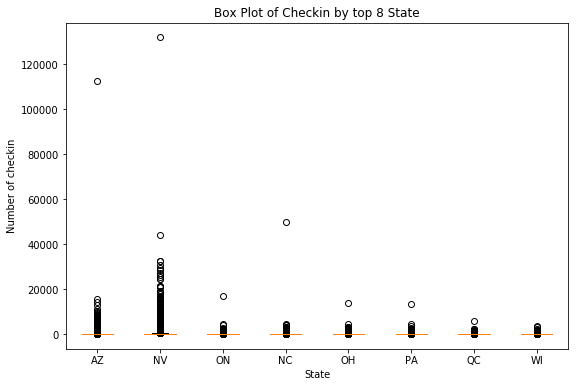

In [243]:
#plot
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
ax.set_xticklabels([state_sorted[0], state_sorted[1],state_sorted[2],state_sorted[3],state_sorted[4],state_sorted[5], state_sorted[6],state_sorted[7]])
plt.ylabel('Number of checkin')
plt.xlabel('State')
plt.title('Box Plot of Checkin by top 8 State')
plt.show()
#fig.savefig('fig1.png', bbox_inches='tight')

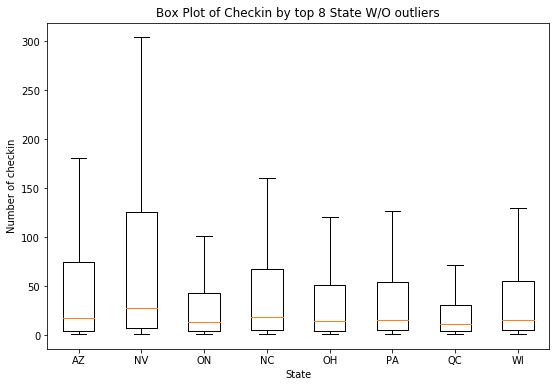

In [244]:
#plot
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot, 0, '')
plt.ylabel('Number of checkin')
plt.xlabel('State')
plt.title('Box Plot of Checkin by top 8 State W/O outliers')
ax.set_xticklabels([state_sorted[0], state_sorted[1],state_sorted[2],state_sorted[3],state_sorted[4],state_sorted[5], state_sorted[6],state_sorted[7]])
plt.show()
#fig.savefig('fig2.png', bbox_inches='tight')